<a href="https://colab.research.google.com/github/Weedmastercrucifer/Neural-Networks-and-Fuzzy-Logic/blob/main/Assignment1Details/Assignment1_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ASSIGNMENT 1  QUESTION NUMBER 5

In [ ]:
data=pd.read_excel('/content/drive/MyDrive/Assignment1NNFL/Copy of data_q4_q5.xlsx') 
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#testing models against test data 
def predict(X_test,y_test,weights):
  hypothesis=X_test@weights
  y_pred=np.round(sigmoid(hypothesis.astype(float)))
  #printing predicted and actual output
  #for i in range(X_test.shape[0]):
        #print("Predicted: {0}  Actual:{1}".format(y_pred[i],round(y_test[i])))
  return y_pred

In [ ]:
def sas(y_pred, y_test):
    tp = tn = fp = fn = 0 #initialising true positive, true negative, false positive and false negative
    m = y_test.shape[0]
    for i in range(m):
        if y_pred[i] == 1:
            if y_test[i] == 1:
                tp+=1
            else:
                fp+=1
        elif y_pred[i] == 0:
            if y_test[i] == 0:
                tn+=1
            else:
                fn+=1
    se = tp/(tp+fn)
    sp = tn/(tn+fp)
    ac = (tn+tp)/m
    print("Sensitivity: {0}, Specificity: {1} and Accuracy: {2}".format(se,sp,ac)) 
    return se,sp,ac

In [ ]:
def partition(vector, fold, k):
    size = vector.shape[0]
    start =round((size/k)*fold)
    end = round((size/k)*(fold+1))
    validation = vector[start:end]
    training = np.concatenate((vector[:start], vector[end:])) 
    print(training.shape)
    print(validation.shape)
    return training, validation

In [ ]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [ ]:
data.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [ ]:
data['diagnosis'].astype(str)

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [ ]:
data=data.sample(frac=1, random_state=50)#randomising data
data=np.array(data)

In [ ]:
#sigmoid function
def sigmoid(x): 
 return 1.0/(1 + np.exp(-x))

In [ ]:
#cost for an observation
def logistic_loss(y_train,y_pred):
  loss = -y_train * np.log(y_pred)
  loss -= (1-y_train)*np.log(1-y_pred)
  return loss

In [ ]:
def cost_function_no_regu(X,y,w):
  hypothesis=sigmoid(np.dot(X,w.T).astype(float))
  J=(1/(2*len(y)))*np.sum(logistic_loss(y,hypothesis))
  return J

In [ ]:
def batch_gradient_descent_no_regu(X,y,w,alpha,iters):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration 
  for t in range(iters): 
    
    hypothesis=sigmoid(np.dot(X,w.T).astype(float))
    w=w-(alpha/len(y))*(np.dot(hypothesis-y,X))#updating the weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_no_regu(X,y,w)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist  



In [ ]:
def stochastic_gradient_descent_no_regu(X,y,w,alpha,iters):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration 
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+1]#selecting features of that index
    Ind_Y=y[index:index+1]#selecting the true output of that index 
    w=w-alpha*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_no_regu(X,y,w)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist  

In [ ]:
def minibatch_gradient_descent_no_regu(X,y,w,alpha,iters,batch_size):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+batch_size]#selecting features from that index to index+batchsize-1
    Ind_Y=y[index:index+batch_size]#selecting the true outputs from that index to index+batch_size-1
    w=w-(alpha/batch_size)*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_no_regu(X,y,w)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist

In [ ]:
def cost_function_L2_regu(X,y,w,L2): 
  hypothesis=sigmoid(np.dot(X,w.T).astype(float))
  J=(1/(2*len(y)))*np.sum(logistic_loss(y,hypothesis))+((L2/(2*len(y)))*np.sum(w**2)) 
  return J



In [ ]:
def batch_gradient_descent_L2_regu(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#storing cost function value of each iteration
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration
  for t in range(iters): 
    hypothesis=sigmoid(np.dot(X,w.T).astype(float)) 
    w=(w*(1-(alpha*Lambda_)))-(alpha/len(y))*(np.dot(hypothesis-y,X))#updating the weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_L2_regu(X,y,w,Lambda_)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist



In [ ]:
def stochastic_gradient_descent_L2_regu(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration 
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+1]#selecting features of that index
    Ind_Y=y[index:index+1]#selecting the true output of that index 
    w=(w*(1-(alpha*Lambda_)))-alpha*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_L2_regu(X,y,w,Lambda_)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist 

In [ ]:
def minibatch_gradient_descent_L2_regu(X,y,w,alpha,iters,batch_size,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+batch_size]#selecting features from that index to index+batchsize-1
    Ind_Y=y[index:index+batch_size]#selecting the true outputs from that index to index+batch_size-1
    w=(w*(1-(alpha*Lambda_)))-(alpha/batch_size)*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value
    w_hist[t]=w
    cost_hist[t]=cost_function_L2_regu(X,y,w,Lambda_)
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist

In [ ]:
def cost_function_L1_regu(X,y,w,L1): 
  hypothesis=sigmoid(np.dot(X,w.T).astype(float))  
  J=(1/(2*len(y)))*np.sum(logistic_loss(y,hypothesis))+((L1/(2*len(y)))*np.sum(abs(w))) 
  return J


In [ ]:
def batch_gradient_descent_L1_regu(X,y,w,alpha,iters,Lambda_): 
  cost_hist=np.zeros(iters)#storing cost function value of each iteration
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration
  for t in range(iters): 
    hypothesis=sigmoid(np.dot(X,w.T).astype(float)) 
    w=w-((alpha*Lambda_)/2)*np.sign(w)-(alpha/len(y))*(np.dot(hypothesis-y,X))#updating the weight value 
    w_hist[t]=w
    cost_hist[t]=cost_function_L1_regu(X,y,w,Lambda_)#storing the cost function value for that iteration 
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]
  return w_best,cost_hist,w_hist


In [ ]:
def stochastic_gradient_descent_L1_regu(X,y,w,alpha,iters,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration 
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+1]#selecting features of that index
    Ind_Y=y[index:index+1]#selecting the true output of that index 
    w=w-((alpha*Lambda_)/2)*np.sign(w) -alpha*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value 
    w_hist[t]=w
    cost_hist[t]=cost_function_L1_regu(X,y,w,Lambda_)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist

In [ ]:
def minibatch_gradient_descent_L1_regu(X,y,w,alpha,iters,batch_size,Lambda_):
  cost_hist=np.zeros(iters)#initialising cost function for each iteration 
  w_hist=np.zeros((iters,31))#for storing weight values at each iteration
  for t in range(iters):
    index=np.random.randint(len(y))#randomly selecting an index from the dataset
    Ind_X=X[index:index+batch_size]#selecting features from that index to index+batchsize-1
    Ind_Y=y[index:index+batch_size]#selecting the true outputs from that index to index+batch_size-1 
    w=w-((alpha*Lambda_)/2)*np.sign(w)-(alpha/batch_size)*(Ind_X.T.dot(sigmoid(np.dot(Ind_X,w.T).astype(float))-Ind_Y))#updating weight value 
    w_hist[t]=w
    cost_hist[t]=cost_function_L1_regu(X,y,w,Lambda_)#storing the cost function value for that iteration
  minpos=np.argmin(cost_hist)
  w_best=w_hist[minpos]  
  return w_best,cost_hist,w_hist

In [ ]:
def Cross_Validation(w, k, examples, labels,c,alpha,iters,Lambda_):
    train_folds_score = []
    test_folds_score = []  
    cost_hist=np.zeros(iters)#storing cost function value of each iteration
    w_hist=np.zeros((iters,31))#for storing weight values at each iteration 
    w_best=np.zeros(31)
    if (c==1):
      #for batch gradient descent with no regularization
      for fold in range(0, k):  
        
        training_set, test_set = partition(examples, fold, k)
        training_labels, test_labels = partition(labels, fold, k)  
        w_best,cost_hist,w_hist=batch_gradient_descent_no_regu(training_set,training_labels,w,alpha,iters)
        training_predicted=predict(training_set,training_labels,w_best)
        test_predicted=predict(test_set,test_labels,w_best)
        train_folds_score.append(sas(training_predicted,training_labels))
        test_folds_score.append(sas(test_predicted,test_labels)) 
    elif (c==2):
      #for stochastic gradient descent with no regularization 
      for fold in range(0, k):  
        
        training_set, test_set = partition(examples, fold, k)
        training_labels, test_labels = partition(labels, fold, k)  
        w_best,cost_hist,w_hist=stochastic_gradient_descent_no_regu(training_set,training_labels,w,alpha,iters)
        training_predicted=predict(training_set,training_labels,w_best)
        test_predicted=predict(test_set,test_labels,w_best)
        train_folds_score.append(sas(training_predicted,training_labels))
        test_folds_score.append(sas(test_predicted,test_labels))
    elif (c==3):
      #for minibatch gradient descent with no regularization 
      for fold in range(0, k):  
        
        training_set, test_set = partition(examples, fold, k)
        training_labels, test_labels = partition(labels, fold, k)  
        w_best,cost_hist,w_hist=minibatch_gradient_descent_no_regu(training_set,training_labels,w,alpha,iters,5)
        training_predicted=predict(training_set,training_labels,w_best)
        test_predicted=predict(test_set,test_labels,w_best)
        train_folds_score.append(sas(training_predicted,training_labels))
        test_folds_score.append(sas(test_predicted,test_labels))
    elif (c==4):
      #for batch gradient descent with L2 regularization 
      for fold in range(0, k):  
        
        training_set, test_set = partition(examples, fold, k)
        training_labels, test_labels = partition(labels, fold, k)  
        w_best,cost_hist,w_hist=batch_gradient_descent_L2_regu(training_set,training_labels,w,alpha,iters,Lambda_)
        training_predicted=predict(training_set,training_labels,w_best)
        test_predicted=predict(test_set,test_labels,w_best)
        train_folds_score.append(sas(training_predicted,training_labels))
        test_folds_score.append(sas(test_predicted,test_labels))  
    elif (c==5):
      #for stochastic gradient descent with L2 regularization 
      for fold in range(0, k):  
        
        training_set, test_set = partition(examples, fold, k)
        training_labels, test_labels = partition(labels, fold, k)  
        w_best,cost_hist,w_hist=stochastic_gradient_descent_L2_regu(training_set,training_labels,w,alpha,iters,Lambda_)
        training_predicted=predict(training_set,training_labels,w_best)
        test_predicted=predict(test_set,test_labels,w_best)
        train_folds_score.append(sas(training_predicted,training_labels))
        test_folds_score.append(sas(test_predicted,test_labels)) 

    elif (c==6):
      #for minibatch gradient descent with L2 regularization 
      for fold in range(0, k):  
        
        training_set, test_set = partition(examples, fold, k)
        training_labels, test_labels = partition(labels, fold, k)  
        w_best,cost_hist,w_hist=minibatch_gradient_descent_L2_regu(training_set,training_labels,w,alpha,iters,5,Lambda_)
        training_predicted=predict(training_set,training_labels,w_best)
        test_predicted=predict(test_set,test_labels,w_best)
        train_folds_score.append(sas(training_predicted,training_labels))
        test_folds_score.append(sas(test_predicted,test_labels))   
    elif (c==7):
      #for batch gradient descent with L1 regularization 
      for fold in range(0, k):  
        
        training_set, test_set = partition(examples, fold, k)
        training_labels, test_labels = partition(labels, fold, k)  
        w_best,cost_hist,w_hist=batch_gradient_descent_L1_regu(training_set,training_labels,w,alpha,iters,Lambda_)
        training_predicted=predict(training_set,training_labels,w_best)
        test_predicted=predict(test_set,test_labels,w_best)
        train_folds_score.append(sas(training_predicted,training_labels))
        test_folds_score.append(sas(test_predicted,test_labels))    
    elif (c==8):
      #for stochastic gradient descent with L1 regularization 
      for fold in range(0, k):  
        
        training_set, test_set = partition(examples, fold, k)
        training_labels, test_labels = partition(labels, fold, k)  
        w_best,cost_hist,w_hist=stochastic_gradient_descent_L1_regu(training_set,training_labels,w,alpha,iters,Lambda_)
        training_predicted=predict(training_set,training_labels,w_best)
        test_predicted=predict(test_set,test_labels,w_best)
        train_folds_score.append(sas(training_predicted,training_labels))
        test_folds_score.append(sas(test_predicted,test_labels))  
    elif (c==9):
      #for minibatch gradient descent with L1 regularization 
      for fold in range(0, k):  
        
        training_set, test_set = partition(examples, fold, k)
        training_labels, test_labels = partition(labels, fold, k)  
        w_best,cost_hist,w_hist=minibatch_gradient_descent_L1_regu(training_set,training_labels,w,alpha,iters,5,Lambda_)
        training_predicted=predict(training_set,training_labels,w_best)
        test_predicted=predict(test_set,test_labels,w_best)
        train_folds_score.append(sas(training_predicted,training_labels))
        test_folds_score.append(sas(test_predicted,test_labels))         



      
        


    return w_best,cost_hist,w_hist,train_folds_score, test_folds_score

In [ ]:
w=np.zeros(31)
alpha=0.05
iters=2000
Lambda_=0.005 
samples=data[:,0:30]
labels=data[:,30] 
labels=np.where(labels=='B',0,1)

In [ ]:
samples_min=np.min(samples,axis=0)
samples_max=np.max(samples,axis=0) 
m=samples.shape[0]  
samples=(samples-samples_min)/(samples_max-samples_min)#normalisation of input features
pp=np.ones([m,1])
samples=np.append(pp,samples,axis=1)


In [ ]:
samples.shape

(569, 31)

In [ ]:
samples

array([[1.0, 0.28723555303137877, 0.30030436252959075, ...,
        0.4323024054982818, 0.3051448846836192, 0.18450741178013905],
       [1.0, 0.15045671825453172, 0.3341224213730132, ...,
        0.07670103092783505, 0.13739404691504045, 0.08120162665617209],
       [1.0, 0.43821288276775994, 0.3063916131214068, ...,
        0.5951890034364261, 0.2375320323280111, 0.3362193362193363],
       ...,
       [1.0, 0.20772398125798663, 0.3104497801826175, ...,
        0.21316151202749142, 0.3355016755371575, 0.09773055227600685],
       [1.0, 0.20630413176203324, 0.3905985796415286, ...,
        0.2844673539518901, 0.24916223142124974, 0.2182867637413092],
       [1.0, 0.24511335131809364, 0.2813662495772743, ...,
        0.19553264604810996, 0.16577961758328408, 0.14593991866719142]],
      dtype=object)

In [ ]:
labels

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,

In [ ]:
w_batch_no_regu,cost_hist_batch_no_regu,w_hist_batch_no_regu,train_folds_score_batch_no_regu, test_folds_score_batch_no_regu=Cross_Validation(w,5,samples,labels,1,alpha,iters,Lambda_)

(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8901734104046243, Specificity: 0.9893617021276596 and Accuracy: 0.9516483516483516
Sensitivity: 0.9230769230769231, Specificity: 0.96 and Accuracy: 0.9473684210526315
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8650306748466258, Specificity: 0.9931506849315068 and Accuracy: 0.9472527472527472
Sensitivity: 0.8571428571428571, Specificity: 0.9846153846153847 and Accuracy: 0.9298245614035088
(456, 31)
(113, 31)
(456,)
(113,)
Sensitivity: 0.8928571428571429, Specificity: 0.9895833333333334 and Accuracy: 0.9539473684210527
Sensitivity: 0.7272727272727273, Specificity: 1.0 and Accuracy: 0.8938053097345132
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8728323699421965, Specificity: 0.9858156028368794 and Accuracy: 0.9428571428571428
Sensitivity: 0.9230769230769231, Specificity: 1.0 and Accuracy: 0.9736842105263158
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8713450292397661, Specificity: 0.9823943661971831 and Accuracy: 0.940659340

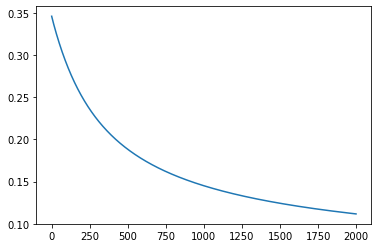

In [ ]:
plt.plot(range(iters),cost_hist_batch_no_regu)
plt.show()



In [ ]:
w_stoch_no_regu,cost_hist_stoch_no_regu,w_hist_stoch_no_regu,train_folds_score_stoch_no_regu, test_folds_score_stoch_no_regu=Cross_Validation(w,5,samples,labels,2,alpha,iters,Lambda_)

(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8959537572254336, Specificity: 0.9893617021276596 and Accuracy: 0.9538461538461539
Sensitivity: 0.9230769230769231, Specificity: 0.96 and Accuracy: 0.9473684210526315
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8711656441717791, Specificity: 0.9931506849315068 and Accuracy: 0.9494505494505494
Sensitivity: 0.8571428571428571, Specificity: 0.9846153846153847 and Accuracy: 0.9298245614035088
(456, 31)
(113, 31)
(456,)
(113,)
Sensitivity: 0.8690476190476191, Specificity: 0.9895833333333334 and Accuracy: 0.9451754385964912
Sensitivity: 0.7045454545454546, Specificity: 0.9855072463768116 and Accuracy: 0.8761061946902655
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8728323699421965, Specificity: 0.9858156028368794 and Accuracy: 0.9428571428571428
Sensitivity: 0.9230769230769231, Specificity: 1.0 and Accuracy: 0.9736842105263158
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8771929824561403, Specificity: 0.9823943661971831 and Accura

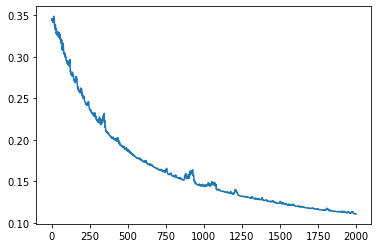

In [ ]:
plt.plot(range(iters),cost_hist_stoch_no_regu)
plt.show()

In [ ]:
w_mini_no_regu,cost_hist_mini_no_regu,w_hist_mini_no_regu,train_folds_score_mini_no_regu, test_folds_score_mini_no_regu=Cross_Validation(w,5,samples,labels,3,alpha,iters,Lambda_)

(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8728323699421965, Specificity: 0.9929078014184397 and Accuracy: 0.9472527472527472
Sensitivity: 0.9230769230769231, Specificity: 0.96 and Accuracy: 0.9473684210526315
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8404907975460123, Specificity: 0.9931506849315068 and Accuracy: 0.9384615384615385
Sensitivity: 0.7959183673469388, Specificity: 0.9846153846153847 and Accuracy: 0.9035087719298246
(456, 31)
(113, 31)
(456,)
(113,)
Sensitivity: 0.8809523809523809, Specificity: 0.9895833333333334 and Accuracy: 0.9495614035087719
Sensitivity: 0.7272727272727273, Specificity: 1.0 and Accuracy: 0.8938053097345132
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8786127167630058, Specificity: 0.9858156028368794 and Accuracy: 0.945054945054945
Sensitivity: 0.9230769230769231, Specificity: 0.9866666666666667 and Accuracy: 0.9649122807017544
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8713450292397661, Specificity: 0.9823943661971831 and Accurac

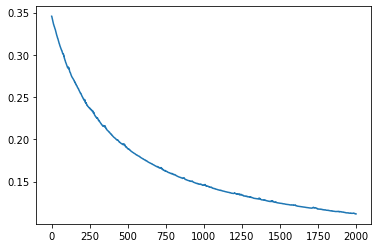

In [ ]:
plt.plot(range(iters),cost_hist_mini_no_regu)
plt.show()

In [ ]:
w_batch_L2_regu,cost_hist_batch_L2_regu,w_hist_batch_L2_regu,train_folds_score_batch_L2_regu, test_folds_score_batch_L2_regu=Cross_Validation(w,5,samples,labels,4,alpha,iters,Lambda_)

(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8728323699421965, Specificity: 0.9929078014184397 and Accuracy: 0.9472527472527472
Sensitivity: 0.9230769230769231, Specificity: 0.96 and Accuracy: 0.9473684210526315
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8404907975460123, Specificity: 0.9931506849315068 and Accuracy: 0.9384615384615385
Sensitivity: 0.7959183673469388, Specificity: 0.9846153846153847 and Accuracy: 0.9035087719298246
(456, 31)
(113, 31)
(456,)
(113,)
Sensitivity: 0.8630952380952381, Specificity: 0.9895833333333334 and Accuracy: 0.9429824561403509
Sensitivity: 0.7045454545454546, Specificity: 1.0 and Accuracy: 0.8849557522123894
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.861271676300578, Specificity: 0.9893617021276596 and Accuracy: 0.9406593406593406
Sensitivity: 0.8974358974358975, Specificity: 1.0 and Accuracy: 0.9649122807017544
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8654970760233918, Specificity: 0.9823943661971831 and Accuracy: 0.9384615384

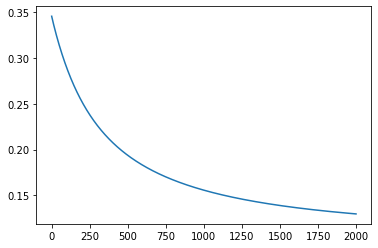

In [ ]:
plt.plot(range(iters),cost_hist_batch_L2_regu)
plt.show()

In [ ]:
w_stoch_L2_regu,cost_hist_stoch_L2_regu,w_hist_stoch_L2_regu,train_folds_score_stoch_L2_regu, test_folds_score_stoch_L2_regu=Cross_Validation(w,5,samples,labels,5,alpha,iters,Lambda_)

(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.884393063583815, Specificity: 0.9858156028368794 and Accuracy: 0.9472527472527472
Sensitivity: 0.9230769230769231, Specificity: 0.96 and Accuracy: 0.9473684210526315
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8711656441717791, Specificity: 0.9897260273972602 and Accuracy: 0.9472527472527472
Sensitivity: 0.8775510204081632, Specificity: 0.9846153846153847 and Accuracy: 0.9385964912280702
(456, 31)
(113, 31)
(456,)
(113,)
Sensitivity: 0.8988095238095238, Specificity: 0.9861111111111112 and Accuracy: 0.9539473684210527
Sensitivity: 0.7727272727272727, Specificity: 0.9855072463768116 and Accuracy: 0.9026548672566371
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8497109826589595, Specificity: 0.9893617021276596 and Accuracy: 0.9362637362637363
Sensitivity: 0.8974358974358975, Specificity: 1.0 and Accuracy: 0.9649122807017544
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.847953216374269, Specificity: 0.9859154929577465 and Accuracy

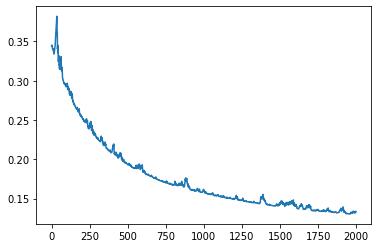

In [ ]:
plt.plot(range(iters),cost_hist_stoch_L2_regu)
plt.show()

In [ ]:
w_mini_L2_regu,cost_hist_mini_L2_regu,w_hist_mini_L2_regu,train_folds_score_mini_L2_regu, test_folds_score_mini_L2_regu=Cross_Validation(w,5,samples,labels,6,alpha,iters,Lambda_)

(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8670520231213873, Specificity: 0.9929078014184397 and Accuracy: 0.945054945054945
Sensitivity: 0.9230769230769231, Specificity: 0.96 and Accuracy: 0.9473684210526315
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8711656441717791, Specificity: 0.9863013698630136 and Accuracy: 0.945054945054945
Sensitivity: 0.8571428571428571, Specificity: 0.9846153846153847 and Accuracy: 0.9298245614035088
(456, 31)
(113, 31)
(456,)
(113,)
Sensitivity: 0.8869047619047619, Specificity: 0.9895833333333334 and Accuracy: 0.9517543859649122
Sensitivity: 0.7272727272727273, Specificity: 0.9855072463768116 and Accuracy: 0.8849557522123894
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8439306358381503, Specificity: 0.9893617021276596 and Accuracy: 0.9340659340659341
Sensitivity: 0.8974358974358975, Specificity: 1.0 and Accuracy: 0.9649122807017544
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8654970760233918, Specificity: 0.9823943661971831 and Accuracy

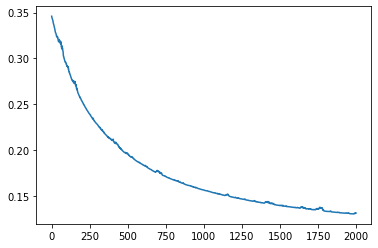

In [ ]:
plt.plot(range(iters),cost_hist_mini_L2_regu)
plt.show()

In [ ]:
w_batch_L1_regu,cost_hist_batch_L1_regu,w_hist_batch_L1_regu,train_folds_score_batch_L1_regu, test_folds_score_batch_L1_regu=Cross_Validation(w,5,samples,labels,7,alpha,iters,Lambda_)

(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8728323699421965, Specificity: 0.9858156028368794 and Accuracy: 0.9428571428571428
Sensitivity: 0.9230769230769231, Specificity: 0.96 and Accuracy: 0.9473684210526315
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.852760736196319, Specificity: 0.9931506849315068 and Accuracy: 0.9428571428571428
Sensitivity: 0.8367346938775511, Specificity: 0.9846153846153847 and Accuracy: 0.9210526315789473
(456, 31)
(113, 31)
(456,)
(113,)
Sensitivity: 0.8809523809523809, Specificity: 0.9895833333333334 and Accuracy: 0.9495614035087719
Sensitivity: 0.75, Specificity: 1.0 and Accuracy: 0.9026548672566371
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8670520231213873, Specificity: 0.9893617021276596 and Accuracy: 0.9428571428571428
Sensitivity: 0.8717948717948718, Specificity: 1.0 and Accuracy: 0.956140350877193
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8654970760233918, Specificity: 0.9823943661971831 and Accuracy: 0.9384615384615385
Sensitiv

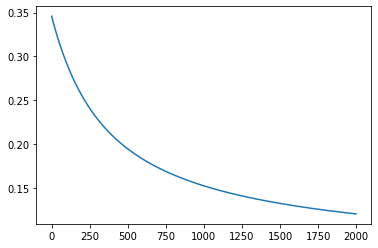

In [ ]:
plt.plot(range(iters),cost_hist_batch_L1_regu)
plt.show()

In [ ]:
w_stoch_L1_regu,cost_hist_stoch_L1_regu,w_hist_stoch_L1_regu,train_folds_score_stoch_L1_regu, test_folds_score_stoch_L1_regu=Cross_Validation(w,5,samples,labels,8,alpha,iters,Lambda_)

(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8786127167630058, Specificity: 0.9893617021276596 and Accuracy: 0.9472527472527472
Sensitivity: 0.9230769230769231, Specificity: 0.96 and Accuracy: 0.9473684210526315
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8773006134969326, Specificity: 0.9828767123287672 and Accuracy: 0.945054945054945
Sensitivity: 0.8979591836734694, Specificity: 0.9692307692307692 and Accuracy: 0.9385964912280702
(456, 31)
(113, 31)
(456,)
(113,)
Sensitivity: 0.8809523809523809, Specificity: 0.9895833333333334 and Accuracy: 0.9495614035087719
Sensitivity: 0.75, Specificity: 1.0 and Accuracy: 0.9026548672566371
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8554913294797688, Specificity: 0.9929078014184397 and Accuracy: 0.9406593406593406
Sensitivity: 0.8717948717948718, Specificity: 1.0 and Accuracy: 0.956140350877193
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8713450292397661, Specificity: 0.9788732394366197 and Accuracy: 0.9384615384615385
Sensitiv

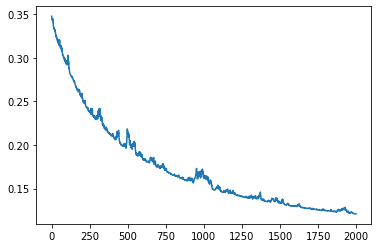

In [ ]:
plt.plot(range(iters),cost_hist_stoch_L1_regu)
plt.show()

In [ ]:
w_mini_L1_regu,cost_hist_mini_L1_regu,w_hist_mini_L1_regu,train_folds_score_mini_L1_regu, test_folds_score_mini_L1_regu=Cross_Validation(w,5,samples,labels,9,alpha,iters,Lambda_)

(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.884393063583815, Specificity: 0.9858156028368794 and Accuracy: 0.9472527472527472
Sensitivity: 0.9230769230769231, Specificity: 0.96 and Accuracy: 0.9473684210526315
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8650306748466258, Specificity: 0.9931506849315068 and Accuracy: 0.9472527472527472
Sensitivity: 0.8571428571428571, Specificity: 0.9846153846153847 and Accuracy: 0.9298245614035088
(456, 31)
(113, 31)
(456,)
(113,)
Sensitivity: 0.8690476190476191, Specificity: 0.9895833333333334 and Accuracy: 0.9451754385964912
Sensitivity: 0.7272727272727273, Specificity: 1.0 and Accuracy: 0.8938053097345132
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8497109826589595, Specificity: 0.9893617021276596 and Accuracy: 0.9362637362637363
Sensitivity: 0.8717948717948718, Specificity: 1.0 and Accuracy: 0.956140350877193
(455, 31)
(114, 31)
(455,)
(114,)
Sensitivity: 0.8596491228070176, Specificity: 0.9859154929577465 and Accuracy: 0.93846153846

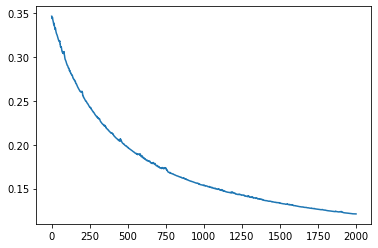

In [ ]:
plt.plot(range(iters),cost_hist_mini_L1_regu)
plt.show()